/tmp/ipykernel_16254/4116498721.py:35: RuntimeWarning: invalid value encountered in divide
  u_normalized = u_trimmed / norm
/tmp/ipykernel_16254/4116498721.py:36: RuntimeWarning: invalid value encountered in divide
  v_normalized = v_trimmed / norm


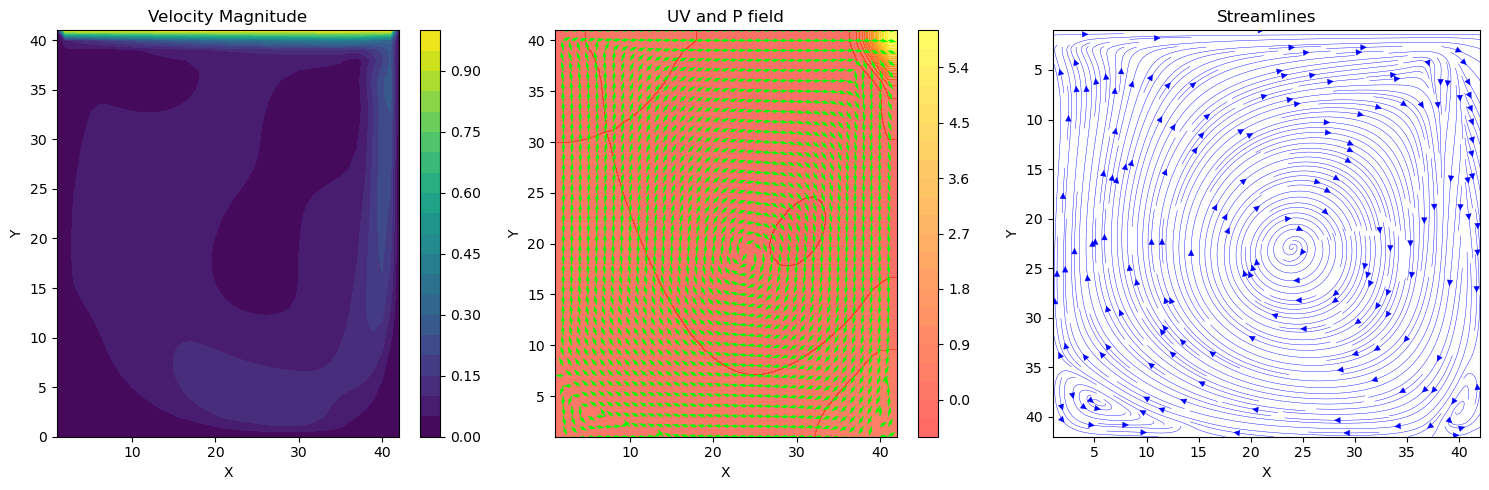

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 定义文件夹编号
i = 400  # 替换为实际编号

# 构造路径
base_folder = os.path.join(os.getcwd(), 'result', str(i))  # 同一程序文件夹下的 result/i 文件夹

# 读取速度分量数据
u = np.loadtxt(os.path.join(base_folder, 'u.dat'))
v = np.loadtxt(os.path.join(base_folder, 'v.dat'))

# 读取压力数据
p = np.loadtxt(os.path.join(base_folder, 'p.dat'))

# 去掉上下左右各一行
u_trimmed = u#[1:-1, 1:-1]
v_trimmed = v#[1:-1, 1:-1]
p_trimmed = p#[1:-1, 1:-1]  # 处理压力数据

# 计算速度大小
magnitude = np.sqrt(u_trimmed**2 + v_trimmed**2)

# 创建网格
n_trimmed = u_trimmed.shape[0]

x = np.arange(1, n_trimmed + 1)  # x 从 1 到 n-2
y = np.arange(1, n_trimmed + 1)  # y 从 1 到 n-2
X, Y = np.meshgrid(x, n_trimmed - y)

# 归一化速度矢量
norm = np.sqrt(u_trimmed**2 + v_trimmed**2)
u_normalized = u_trimmed / norm
v_normalized = v_trimmed / norm

# 绘制速度和流线的图形
plt.figure(figsize=(15, 5))  # 增加窗口宽度以容纳三个图

# 绘制速度大小的等高线图
plt.subplot(1, 3, 1)  # 1行3列第1个
contour = plt.contourf(X, Y, magnitude, levels=20, cmap='viridis')
plt.colorbar(contour)
plt.title('Velocity Magnitude')
plt.xlabel('X')
plt.ylabel('Y')

# 绘制归一化的速度矢量图，添加压力的等高线
plt.subplot(1, 3, 2)  # 1行3列第2个
# 绘制压力的等高线
contour_p = plt.contourf(X, Y, p_trimmed, levels=20, cmap='autumn', alpha=0.6)  # 红橙色系，透明度
plt.colorbar(contour_p)
plt.quiver(X, Y, u_normalized, v_normalized, angles='xy', scale_units='xy', scale=1, color='lime', width=0.004)
plt.xlim(1, n_trimmed)
plt.ylim(1, n_trimmed-1)
plt.title('UV and P field')
plt.xlabel('X')
plt.ylabel('Y')

# 创建新的网格用于流线图
x = np.arange(1, n_trimmed + 1)  # x 从 1 到 n-2
y = np.arange(1, n_trimmed + 1)  # y 从 1 到 n-2
X, Y = np.meshgrid(x, y)  # Y 保持递增

# 绘制流线图
plt.subplot(1, 3, 3)  # 1行3列第3个
strm = plt.streamplot(X, Y, u_trimmed, -v_trimmed, color='b', linewidth=0.3, density=3)  # 翻转v
plt.xlim(1, n_trimmed)
plt.ylim(n_trimmed, 1)  # 反转Y轴显示
plt.title('Streamlines')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()
